<a href="https://colab.research.google.com/github/codml/AI_jupyter/blob/main/chapter_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data), len(test_data))

8982 2246


In [6]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 2.7759 - accuracy: 0.4846 - val_loss: 1.9316 - val_accuracy: 0.5800
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.6388 - accuracy: 0.6402 - val_loss: 1.4380 - val_accuracy: 0.6720
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.2487 - accuracy: 0.7260 - val_loss: 1.2158 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0255 - accuracy: 0.7767 - val_loss: 1.0899 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8548 - accuracy: 0.8150 - val_loss: 1.0078 - val_accuracy: 0.7720
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7179 - accuracy: 0.8480 - val_loss: 0.9494 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6025 - accuracy: 0.8748 - val_loss: 0.8994 - val_accuracy: 0.8000
Epoch 8/20
16

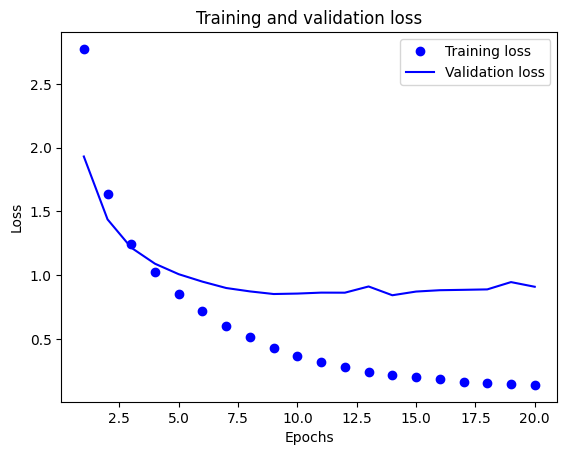

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# def to_one_hot(labels, dimension=46):
#     results = np.zeros(len(labels), dimension)
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# y_train = to_one_hot(train_labels)
# y_test = to_one_hot(test_labels)

from tensorflow import keras

from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(1,len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

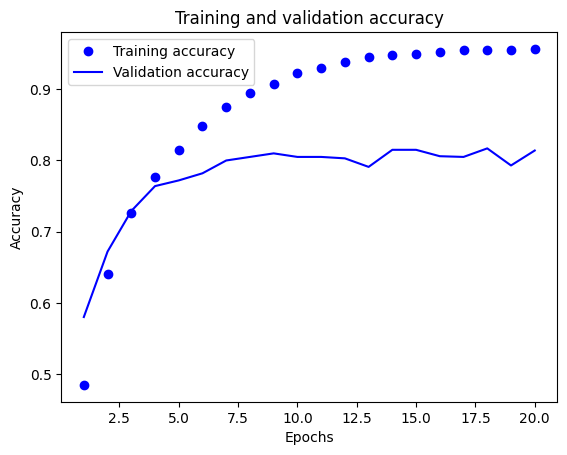

In [11]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.5892 - accuracy: 0.5070
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4097 - accuracy: 0.6963
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0810 - accuracy: 0.7655
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.8806 - accuracy: 0.8125
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7263 - accuracy: 0.8406
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5967 - accuracy: 0.8704
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.4949 - accuracy: 0.8940
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4142 - accuracy: 0.9115
Epoch 9/9
71/71 [==============================] - 0s 5ms/step - loss: 0.9088 - accuracy: 0.7823


In [13]:
predictions = model.predict(x_test)
print(predictions[0])
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)
# model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']) -> integer tensor!!!

71/71 [==============================] - 0s 2ms/step
[2.2913602e-05 5.8314334e-05 1.8913757e-05 8.0887282e-01 1.8108866e-01
 5.0061817e-06 2.8004858e-04 1.2072465e-05 3.1812994e-03 4.4227901e-04
 3.2054293e-06 1.9888146e-04 7.8714336e-05 1.6475875e-04 1.5063501e-04
 1.2344985e-05 5.6270458e-04 2.2174443e-05 3.3140554e-05 3.7871226e-04
 1.1171021e-03 9.0786861e-04 3.6527781e-06 2.7759655e-04 4.7257952e-05
 1.0466563e-04 2.3461233e-05 9.0094392e-05 3.6436904e-06 7.1895440e-05
 3.5889403e-05 1.6158157e-04 2.5288171e-05 1.8218574e-05 1.8228158e-04
 1.6852142e-05 5.6031964e-05 9.3328614e-05 6.7054134e-05 1.0134411e-03
 2.5626699e-05 1.0989160e-05 4.2508538e-05 3.3905676e-06 2.9394650e-06
 9.6451040e-06]


In [18]:
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.2169 - accuracy: 0.5986 - val_loss: 1.5081 - val_accuracy: 0.6700
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2067 - accuracy: 0.7467 - val_loss: 1.1354 - val_accuracy: 0.7620
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9003 - accuracy: 0.8112 - val_loss: 1.0010 - val_accuracy: 0.7910
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7111 - accuracy: 0.8518 - val_loss: 0.9267 - val_accuracy: 0.8090
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.5737 - accuracy: 0.8802 - val_loss: 0.8691 - val_accuracy: 0.8180
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.4676 - accuracy: 0.9032 - val_loss: 0.8348 - val_accuracy: 0.8210
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3856 - accuracy: 0.9204 - val_loss: 0.8186 - val_accuracy: 0.8240
Epoch 8/20
63/63 [=